In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import random
import pandas as pd


In [42]:
t = np.arange(0,2000)
X = np.sin(0.01*t)

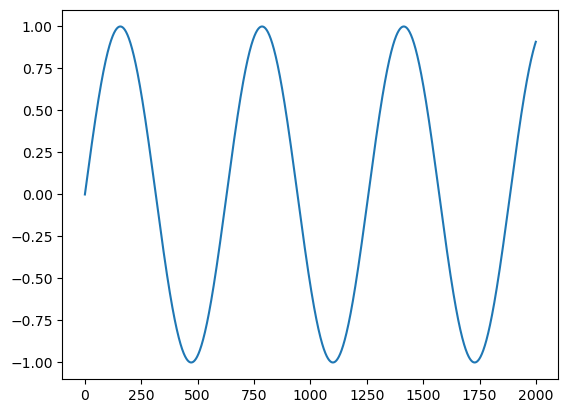

In [43]:
plt.plot(t,X)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

# X_train, X_test = train_test_split(X, test_size = 0.2)
X_train, X_test = X[:1500], X[1500:]

In [65]:
model = Sequential([
    SimpleRNN(units=64, activation='tanh', input_shape=(15,1)),
    Dense(1, activation='linear')
])

c:\Users\sinah\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [67]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
XT, YT = [], []

for i in range(len(X_train) - 15):
    XT.append(X_train[i:i+15])
    YT.append(X_train[i+15])
    
XT = np.array(XT)
XT.shape

(1485, 15)

In [69]:
XT = np.reshape(XT, (XT.shape[0], XT.shape[1], 1))
XT.shape

(1485, 15, 1)

In [70]:
XT[:2], YT[:2]

(array([[[0.        ],
         [0.00999983],
         [0.01999867],
         [0.0299955 ],
         [0.03998933],
         [0.04997917],
         [0.05996401],
         [0.06994285],
         [0.07991469],
         [0.08987855],
         [0.09983342],
         [0.1097783 ],
         [0.11971221],
         [0.12963414],
         [0.13954311]],
 
        [[0.00999983],
         [0.01999867],
         [0.0299955 ],
         [0.03998933],
         [0.04997917],
         [0.05996401],
         [0.06994285],
         [0.07991469],
         [0.08987855],
         [0.09983342],
         [0.1097783 ],
         [0.11971221],
         [0.12963414],
         [0.13954311],
         [0.14943813]]]),
 [0.14943813247359922, 0.15931820661424598])

In [71]:
xt, yt = [], []
for i in range(len(X_test) - 15):
    xt.append(X_test[i:i+15])
    yt.append(X_test[i+15])

In [72]:
xt = np.array(xt)
xt.shape

(485, 15)

In [73]:
xt = np.reshape(xt, (xt.shape[0], xt.shape[1], 1))
xt.shape

(485, 15, 1)

In [74]:
YT = np.array(YT)
yt = np.array(yt)

print(YT.shape, yt.shape)

(1485,) (485,)


In [75]:
model.fit(XT, YT, epochs=100, batch_size=20)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0774
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041
Epoch 13/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096
Epoch 14/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077
Epoch 15/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044
Epoc

In [76]:
model.evaluate(xt,yt)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015     


0.001530361594632268

In [77]:
XTpredict = model.predict(XT)
xtPredict = model.predict(xt)
Xfinal = np.concatenate([XTpredict, xtPredict],axis=0)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


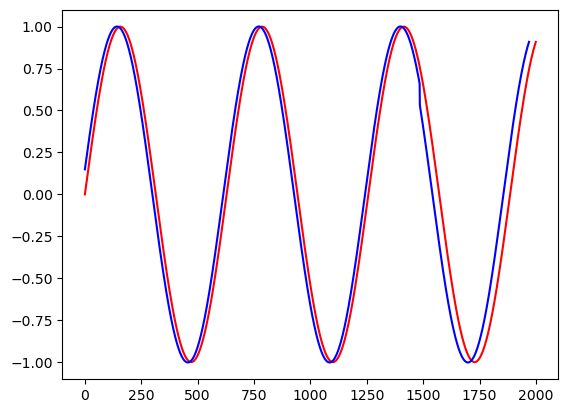

In [78]:
plt.plot(X, color='red')
plt.plot(Xfinal, color='blue')
plt.show()